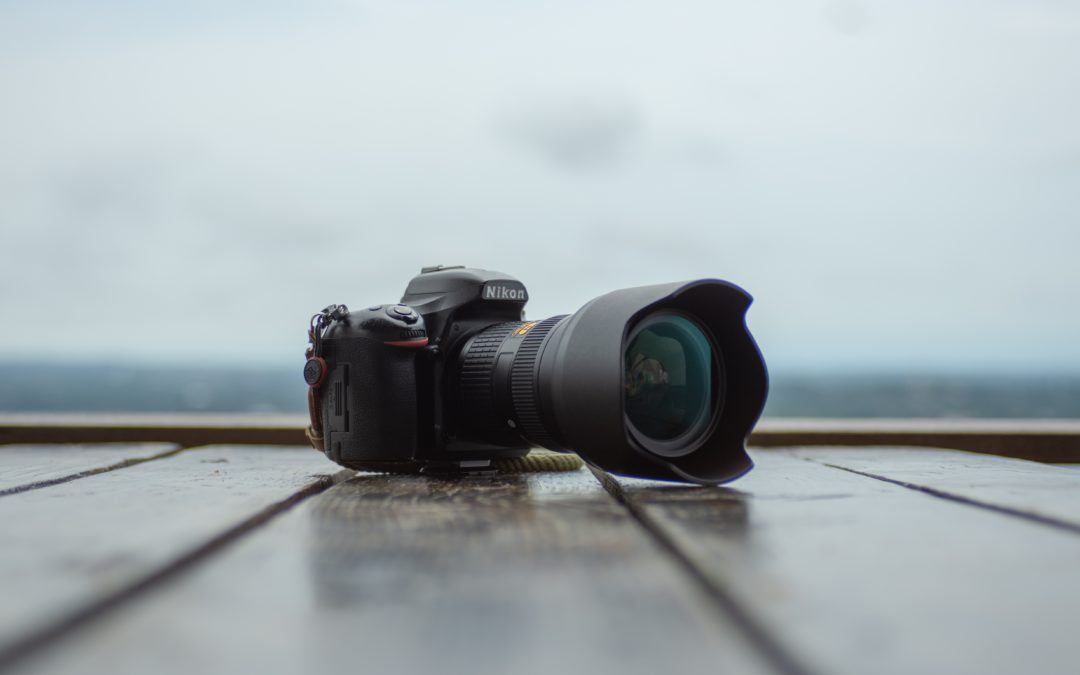

Image saved as output_img.png


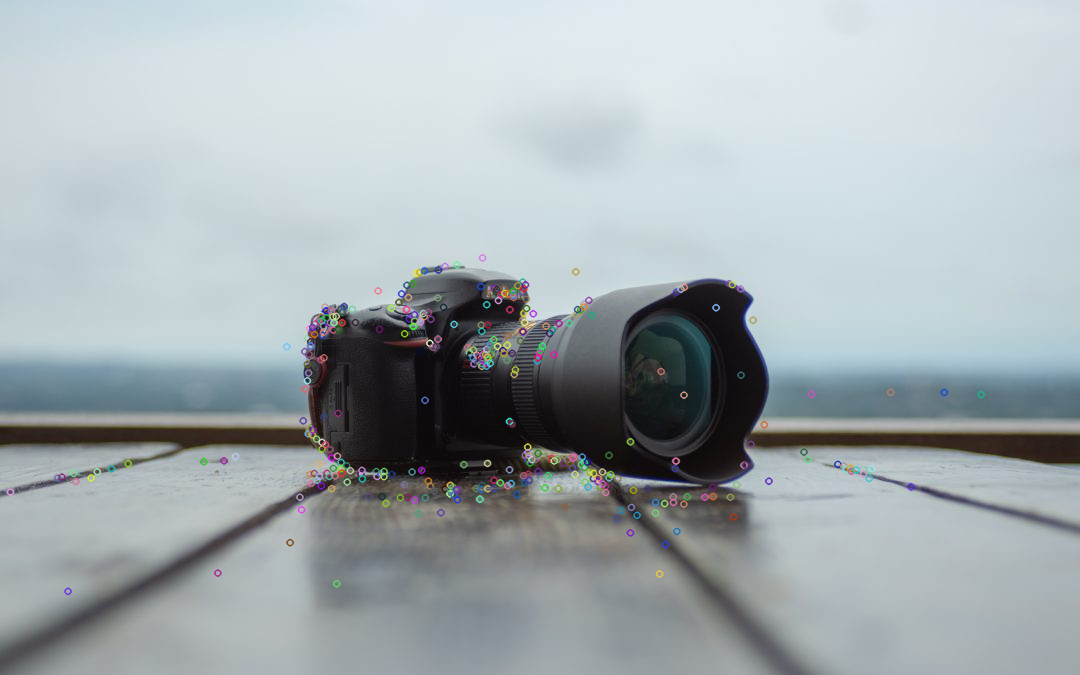

In [ ]:
#Python code for reading an image in one format, show it in a window and write the same image in other format.Then find the Interest points of that image.

import cv2
from google.colab.patches import cv2_imshow
input_image_path = 'img.jpg'
image = cv2.imread(input_image_path)
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
output_image_path = 'output_img.png'
cv2.imwrite(output_image_path, image)

print(f"Image saved as {output_image_path}")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray_image, None)
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)
cv2_imshow(image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()


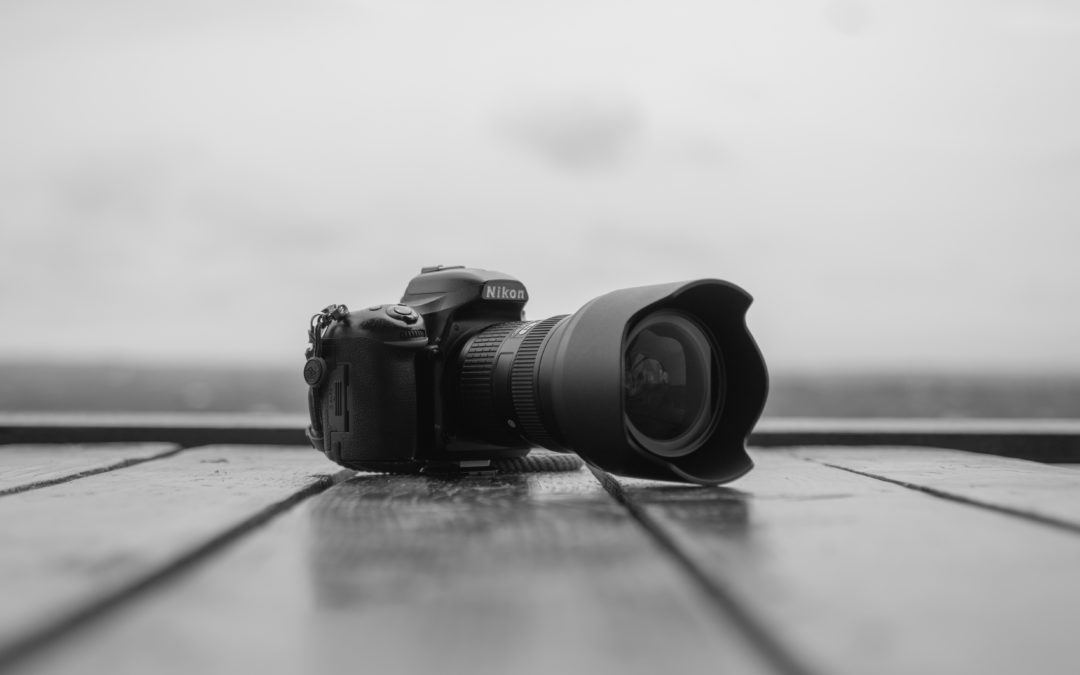

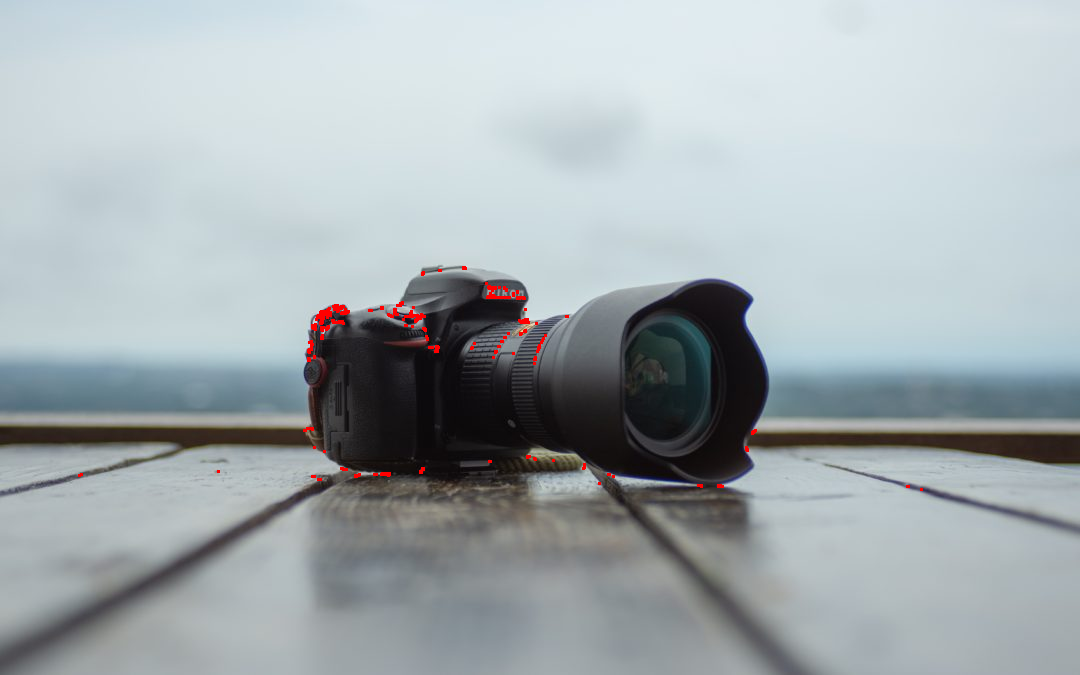

In [ ]:
#Use the color conversion function for converting the image from one color code to other: convert image from BGR to grayscale.Then find the corner points of that image.
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('img.jpg')
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(operatedImage)
operatedImage = np.float32(operatedImage)
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07)
dest = cv2.dilate(dest, None)
image[dest > 0.01 * dest.max()]=[0, 0, 255]
cv2_imshow (image)



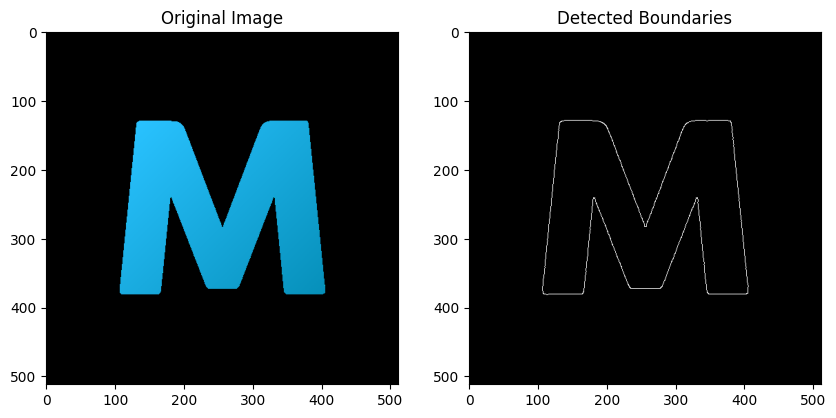

In [ ]:
#Clearly identify the Edge of a letter M, using the Canny Edge detection.
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_boundaries(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    edges = cv2.Canny(blurred_image, 50, 150)
    return edges


input_image_path = "m.png"
edges = detect_boundaries(input_image_path)
original_image = cv2.imread(input_image_path)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Detected Boundaries")
plt.show()


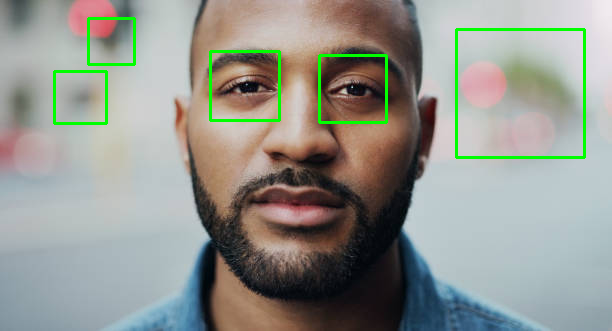

In [ ]:
#Use the Haar Cascade classifier to detect the Eyes of a human being. use a single person photo as an input image.
#https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_eye.xml (download from here)
import cv2
from google.colab.patches import cv2_imshow
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
image = cv2.imread('man.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
for (x, y, w, h) in eyes:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


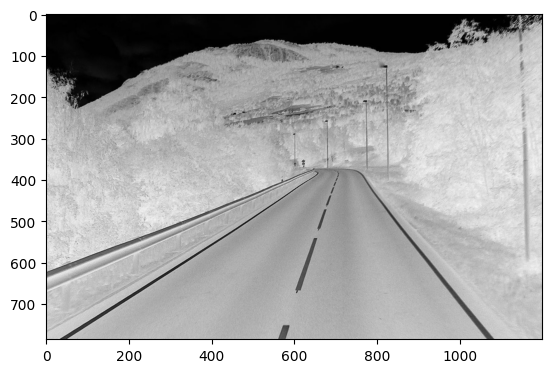

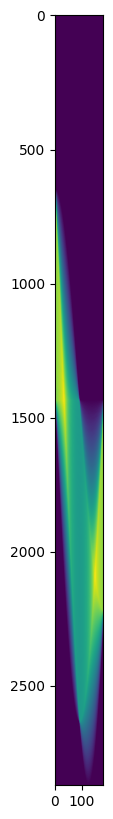

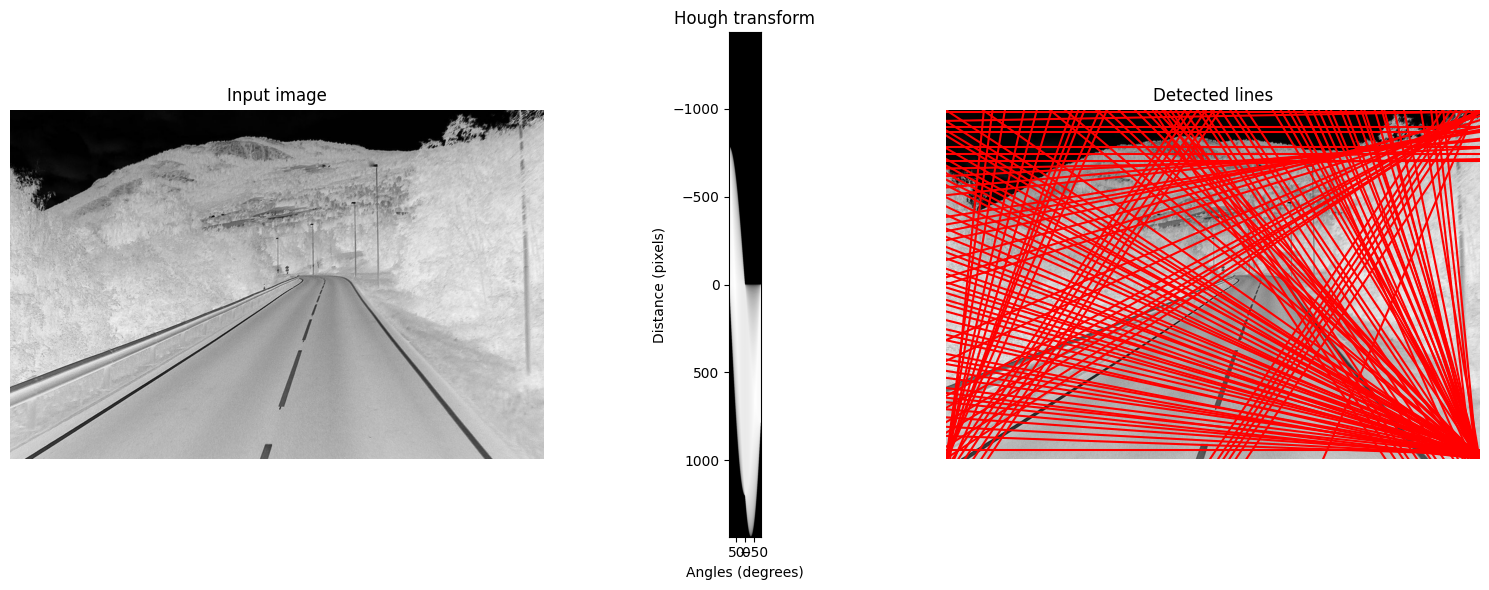

0.0


In [ ]:
#Use Hough transform to detect the lines of the road lanes.
from skimage.transform import (hough_line, hough_line_peaks)
import numpy as np
import cv2
from matplotlib import pyplot as plt
image_path = 'road.jpg'
img = cv2.imread(image_path,0)
plt.imshow(img)
# inverted
img = ~img
plt.imshow(img,cmap='gray')
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 180)

# Perform Hough Transformation to change x, y, to h, theta, dist space.
hspace, theta, dist = hough_line(img, tested_angles)

plt.figure(figsize=(10,10))
plt.imshow(hspace)
# to find the peaks in image
h, q, d = hough_line_peaks(hspace, theta, dist)
#Example code from skimage documentation to plot the detected lines
angle_list=[]  #Create an empty list to capture all angles

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + hspace),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), dist[-1], dist[0]],
             cmap='gray', aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(img, cmap='gray')

origin = np.array((0, img.shape[1]))

for _, angle, dist in zip(*hough_line_peaks(hspace, theta, dist)):
    angle_list.append(angle) #Not for plotting but later calculation of angles
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')
ax[2].set_xlim(origin)
ax[2].set_ylim((img.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

angles = [a*180/np.pi for a in angle_list]

# Compute difference between the two lines
angle_difference = np.max(angles) - np.min(angles)
print(180-angle_difference)

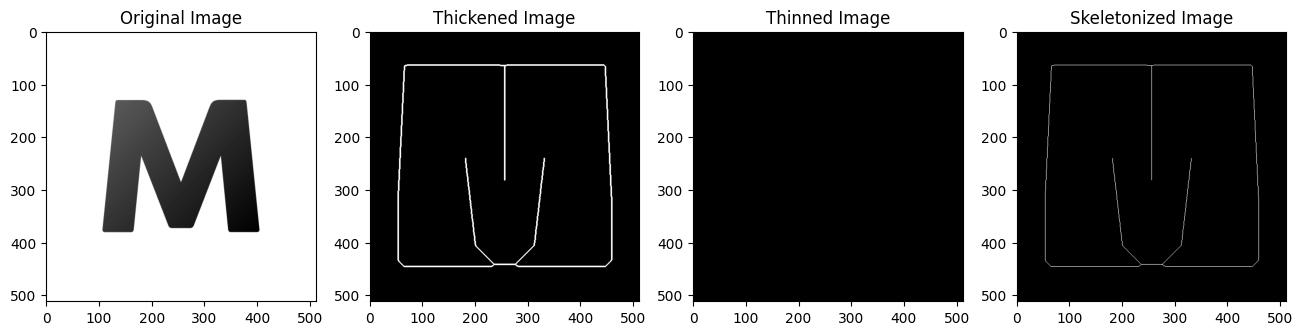

In [ ]:
#Makes a shape thicker by adding boundary layers to all the shapes in the image.(also contains code for thinning and skeletonizing)
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, morphology

def read_image(image_path):
    # Read the image and convert to grayscale
    image = io.imread(image_path, as_gray=True)
    return image

def skeletonize(image):
    # Perform skeletonization
    skeleton = morphology.skeletonize(image)
    return skeleton

def thickening(image):
    # Perform skeletonization
    skeleton = morphology.skeletonize(image)

    # Perform thickening
    thickened_image = morphology.binary_dilation(skeleton)
    return thickened_image

def thinning(image):
    # Perform skeletonization
    skeleton = morphology.skeletonize(image)

    # Perform thinning
    thinned_image = morphology.binary_erosion(skeleton)
    return thinned_image

# Path to the input image
input_image_path = "m.png"

# Read the image
image = read_image(input_image_path)

# Perform skeletonization
skeleton = skeletonize(image)

# Perform thickening
thickened_image = thickening(image)

# Perform thinning
thinned_image = thinning(image)

# Display the results
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Original Image")



ax[1].imshow(thickened_image, cmap=plt.cm.gray)
ax[1].set_title("Thickened Image")

ax[2].imshow(thinned_image, cmap=plt.cm.gray)
ax[2].set_title("Thinned Image")

ax[3].imshow(skeleton, cmap=plt.cm.gray)
ax[3].set_title("Skeletonized Image")

plt.show()

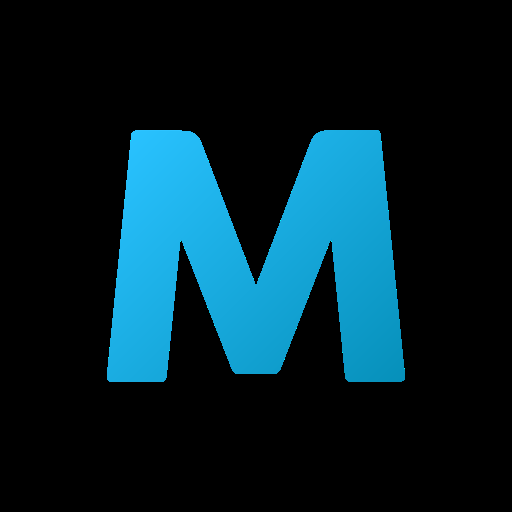

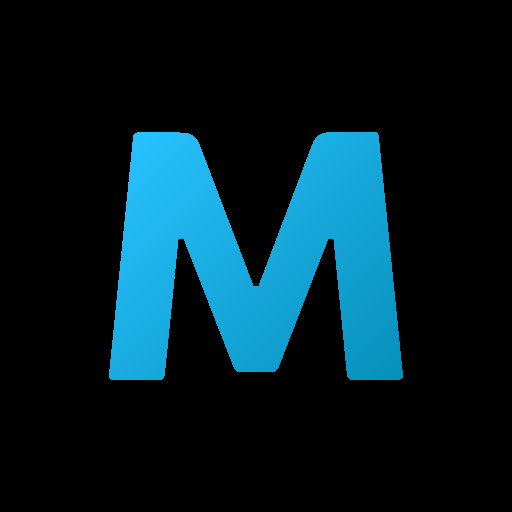

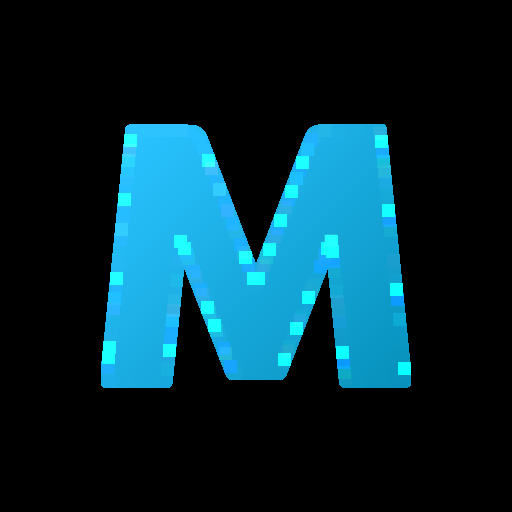

In [ ]:
#Apply Erosion and Dilation to an image.
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image_path = 'm.png'
image = cv2.imread(image_path)
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(image, kernel, iterations=1)
dilation = cv2.dilate(image, kernel, iterations=3)
cv2_imshow(image)  # Display the original image
cv2_imshow(erosion)  # Display the eroded image
cv2_imshow(dilation)



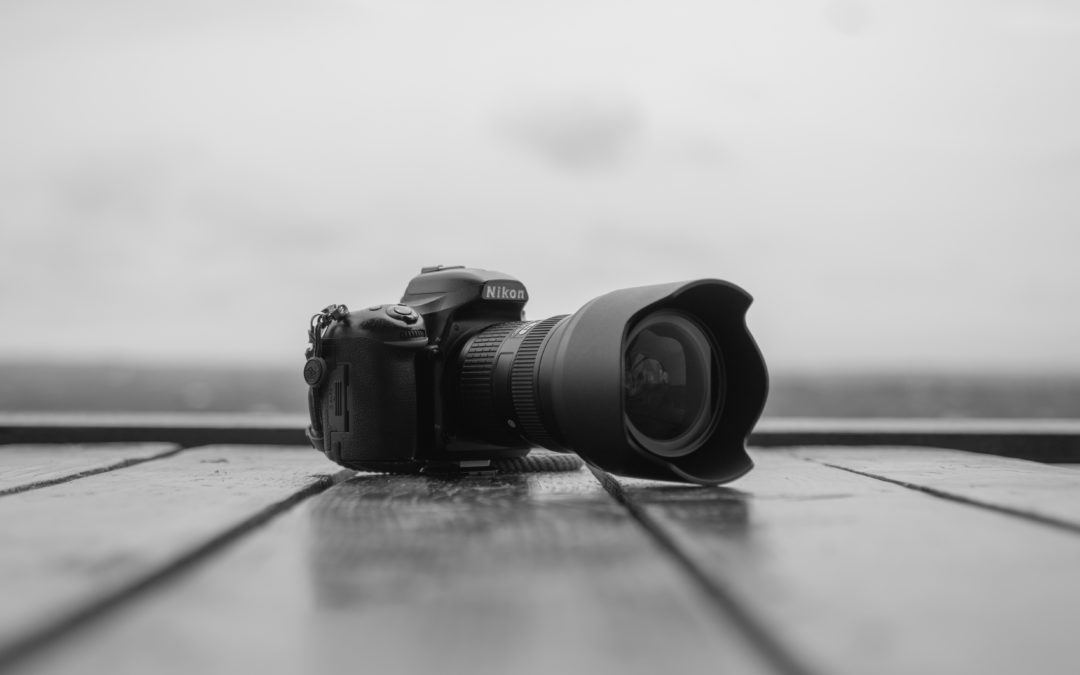

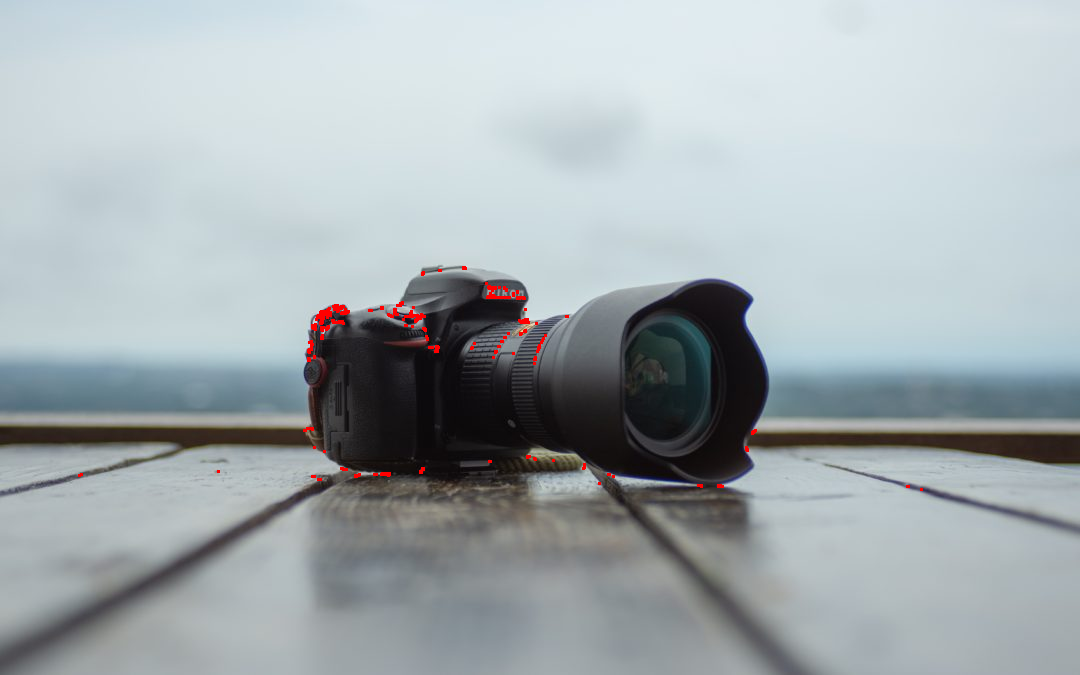

In [ ]:
#Apply Harris corner point detection to an image for detecting corner point.
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('img.jpg')
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(operatedImage)
operatedImage = np.float32(operatedImage)
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07)
dest = cv2.dilate(dest, None)
image[dest > 0.01 * dest.max()]=[0, 0, 255]
cv2_imshow (image)


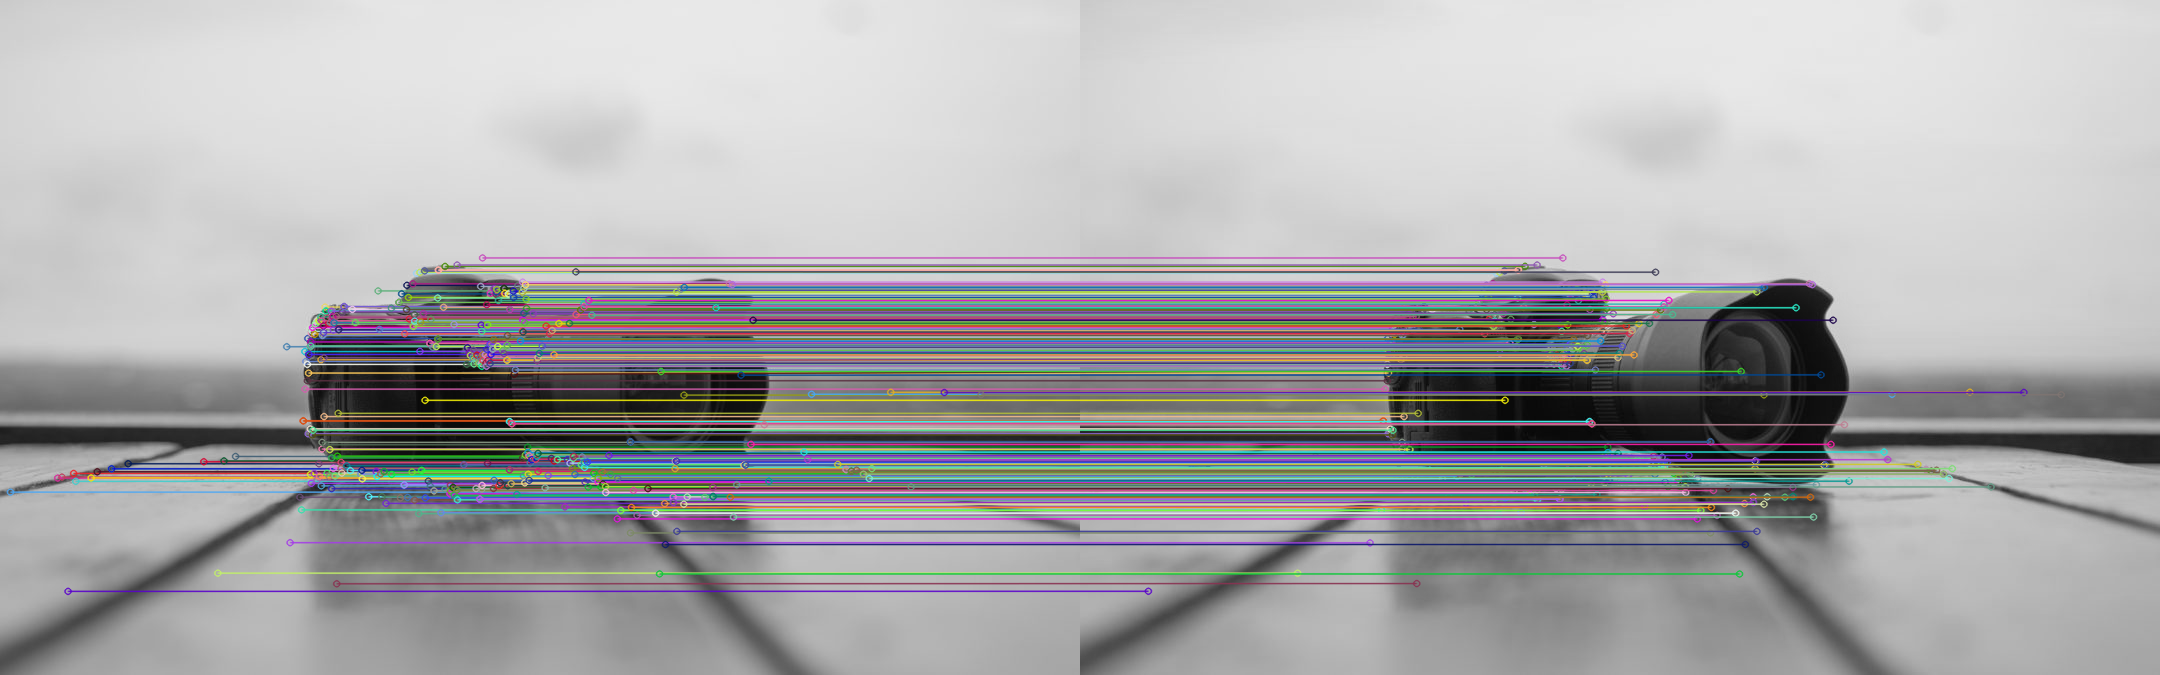

In [ ]:
#Find the key points and descriptors then find the matching features of two images.
import cv2
from google.colab.patches import cv2_imshow

# Load the two images
image1 = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('output_img.png', cv2.IMREAD_GRAYSCALE)

# Initialize the feature detector (SIFT in this example)
detector = cv2.SIFT_create()

# Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = detector.detectAndCompute(image1, None)
keypoints2, descriptors2 = detector.detectAndCompute(image2, None)

# Initialize a Brute-Force Matcher
bf = cv2.BFMatcher()

# Match descriptors using KNN
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply a ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw the matching keypoints
result_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the result image
cv2_imshow(result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
